In [20]:
# Import required libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [21]:
# Load the dataset from the text file
dataset_path = r'C:\Users\nikhil kumar\OneDrive\Desktop\Cyfuture\train_snli.txt'  # Replace with your file path
data = pd.read_csv(dataset_path, sep="\t", header=None, names=["text1", "text2", "label"])

In [22]:
data.head()

,text1,text2,label
0,A person on a horse jumps over a broken down a...,"A person is at a diner, ordering an omelette.",0
1,A person on a horse jumps over a broken down a...,"A person is outdoors, on a horse.",1
2,Children smiling and waving at camera,There are children present,1
3,Children smiling and waving at camera,The kids are frowning,0
4,A boy is jumping on skateboard in the middle o...,The boy skates down the sidewalk.,0


In [23]:
# Convert labels to integer
data['label'] = data['label'].astype(int)

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367373 entries, 0 to 367372
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   text1   367373 non-null  object
 1   text2   367369 non-null  object
 2   label   367373 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 8.4+ MB


In [25]:
# Check for NaN values in each column
print(data.isnull().sum())

text1    0
text2    4
label    0
dtype: int64


In [26]:
data['text2'] = data['text2'].fillna('')  # Fill NaN in 'text2'

In [27]:
print(data.isnull().sum())

text1    0
text2    0
label    0
dtype: int64


In [28]:
# Step 3: TF-IDF Feature Extraction
tfidf_vectorizer = TfidfVectorizer()

# Compute TF-IDF vectors for text1 and text2
tfidf_text1 = tfidf_vectorizer.fit_transform(data['text1'])
tfidf_text2 = tfidf_vectorizer.transform(data['text2'])

In [29]:
# Step 4: Calculate Cosine Similarity
cosine_similarities = [
    cosine_similarity(tfidf_text1[i], tfidf_text2[i])[0][0]
    for i in range(tfidf_text1.shape[0])
]

In [30]:
# Step 5: Combine Features
# Combine TF-IDF difference with cosine similarity as features
features = sp.hstack([tfidf_text1 - tfidf_text2, sp.csr_matrix(cosine_similarities).T])

In [31]:
# Step 6: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(features, data['label'], test_size=0.2, random_state=42)


In [32]:
# Step 7: Train Logistic Regression Model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [33]:
# Step 8: Evaluate the Model
y_pred = model.predict(X_test)

In [34]:
# Step 9: Display Results
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.7864171486900307
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.77      0.78     36795
           1       0.78      0.80      0.79     36680

    accuracy                           0.79     73475
   macro avg       0.79      0.79      0.79     73475
weighted avg       0.79      0.79      0.79     73475



In [41]:
# Step 9: Test the Model with Custom Input
def predict_plagiarism(text1, text2):
    # Transform the custom input using the TF-IDF vectorizer
    vector1 = tfidf_vectorizer.transform([text1])
    vector2 = tfidf_vectorizer.transform([text2])
    
    # Compute the TF-IDF difference and cosine similarity
    tfidf_difference = vector1 - vector2
    cosine_similarity_value = cosine_similarity(vector1, vector2)[0][0]
    
    # Combine features
    custom_features = sp.hstack([tfidf_difference, sp.csr_matrix([cosine_similarity_value])])
    
    # Predict using the trained model
    prediction = model.predict(custom_features)
    
    # Return the prediction result
    return 'Plagiarized' if prediction[0] == 1 else 'Not Plagiarized'

# Example Test
sample_text1 = "A bearded man in a black t-shirt sits in front of a desk holding a computer."
sample_text2 = "A man waiting with his computer."
result = predict_plagiarism(sample_text1, sample_text2)
print(f"Prediction: {result}")

Prediction: Plagiarized


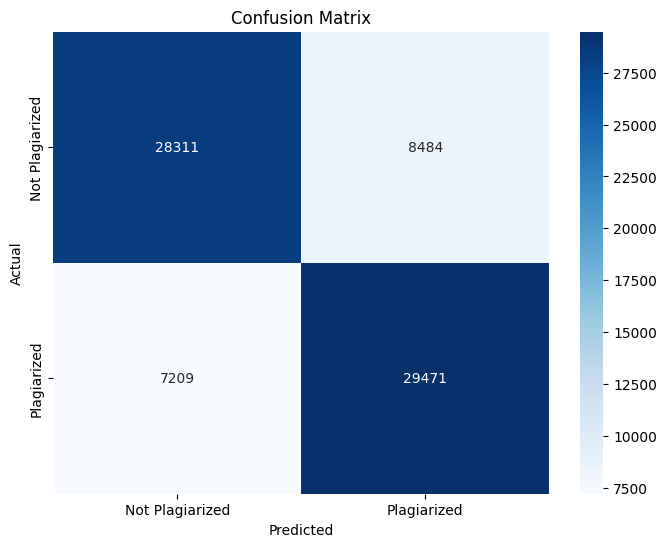

In [37]:
# prompt: print  confysion matrrix

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# ... (Your existing code) ...

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", 
            xticklabels=['Not Plagiarized', 'Plagiarized'],
            yticklabels=['Not Plagiarized', 'Plagiarized'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [38]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.1, 1, 10],
    'solver': ['liblinear', 'lbfgs']
}
grid = GridSearchCV(LogisticRegression(max_iter=1000), param_grid, cv=3, scoring='accuracy')
grid.fit(X_train, y_train)
print("Best Parameters:", grid.best_params_)


Best Parameters: {'C': 1, 'solver': 'liblinear'}
